# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 어떤 성능지표를 기준으로 성능을 개선을 시도했고, 그러한 선택의 이유를 적어주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [6]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [51]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=14) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

In [8]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [9]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

결측치는 없다.

In [39]:
a = credit.iloc[:,:10]
b = credit.iloc[:,10:20]
c = credit.iloc[:,20:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B127F1A08>,
      dtype=object)

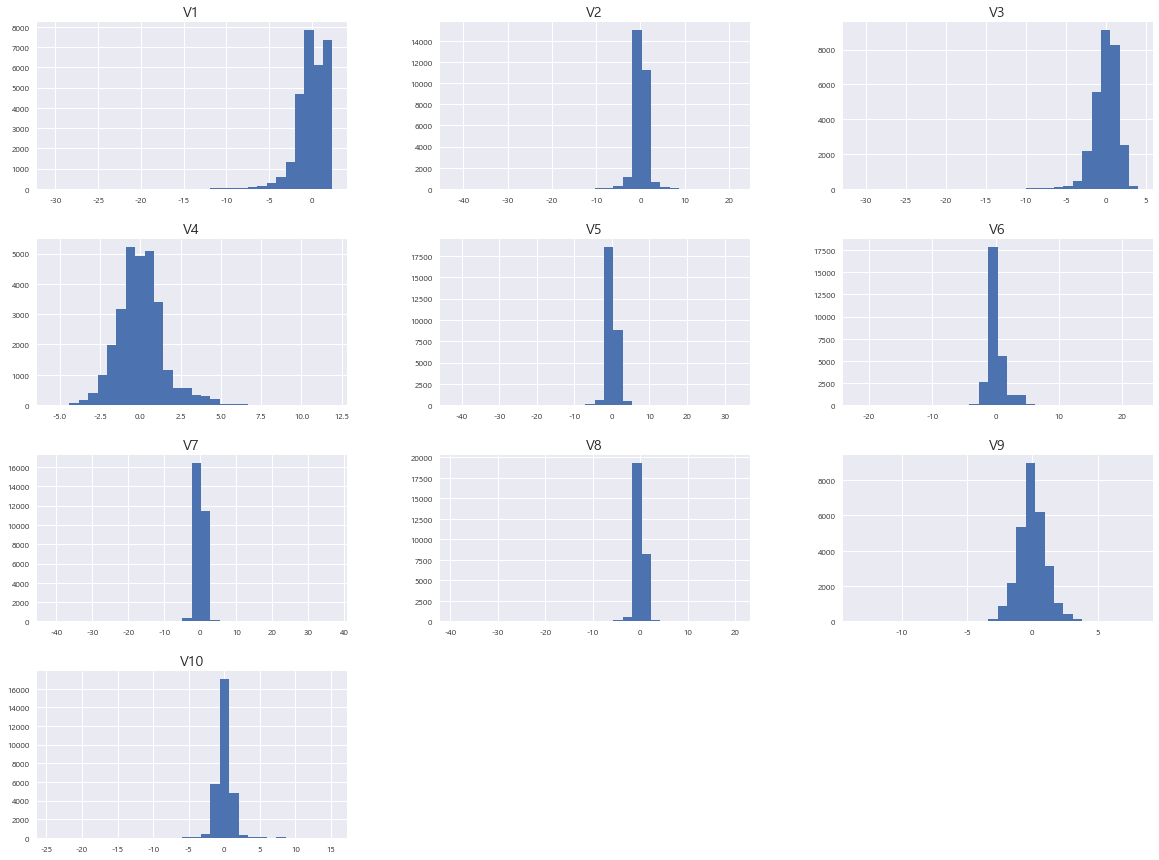

In [53]:
a.hist(bins=30,figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B12F68148>,
      dtype=object)

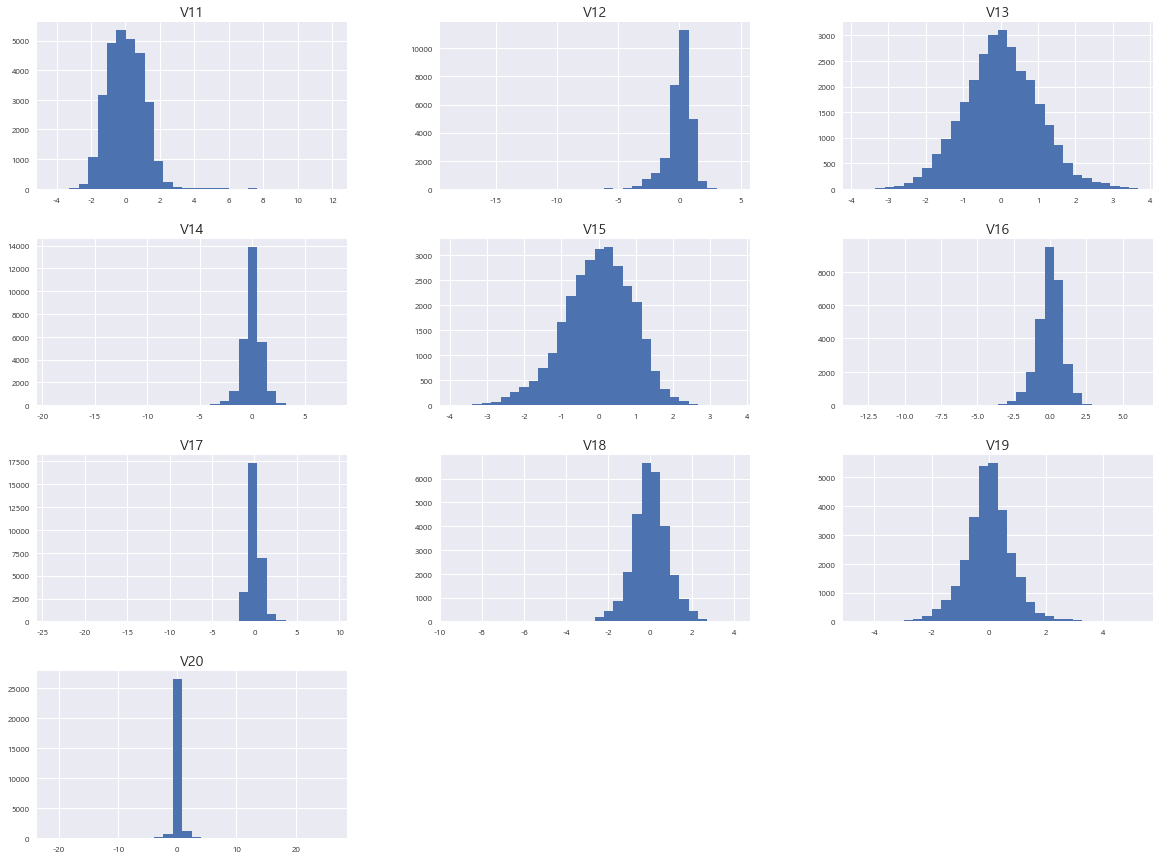

In [54]:
b.hist(bins=30,figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B157A29C8>,
      dtype=object)

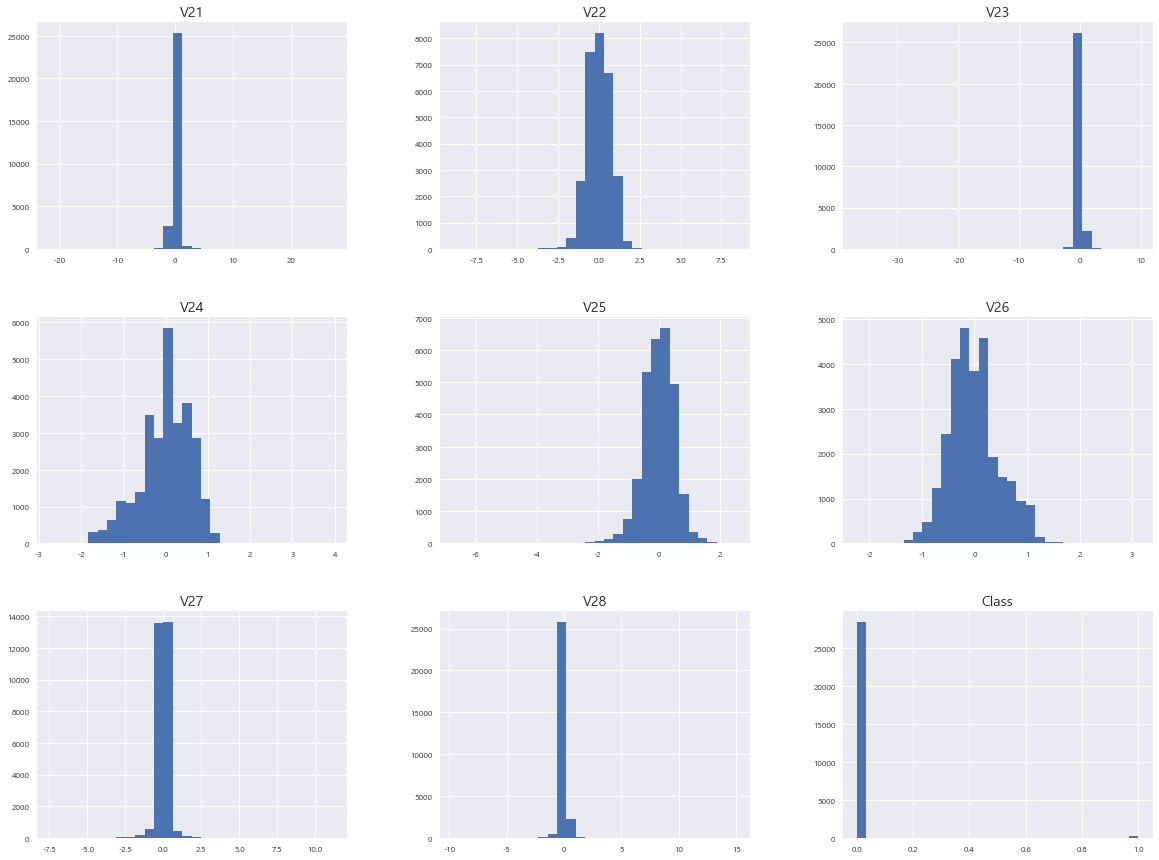

In [55]:
c.hist(bins=30,figsize=(20,15))

In [56]:
credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


In [65]:
origin = credit.copy()

In [66]:
X = credit.drop(['Class'],axis=1)
y = credit[['Class']]

z score 표준화

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Scaling

In [71]:
x_cols = list(credit.columns)
x_cols.remove('Class')

In [72]:
data = pd.DataFrame(scaler.fit_transform(X), columns = x_cols)

In [74]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,...,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04
mean,-5.663771e-17,-2.114526e-17,-2.037486e-17,-7.831722e-18,5.338724e-17,4.483012e-18,-8.807300e-18,6.448443e-18,-2.783494e-18,3.124172e-18,...,2.977835e-17,-2.037099e-17,-5.989690e-19,-1.867220e-17,7.320705e-18,1.014872e-17,3.530324e-17,7.340062e-18,-1.516501e-17,-1.122302e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.503177e+01,-2.612761e+01,-1.766508e+01,-3.776757e+00,-2.832210e+01,-1.637204e+01,-2.849580e+01,-2.878613e+01,-1.182981e+01,-1.944962e+01,...,-5.591230e+00,-2.969587e+01,-2.533713e+01,-1.201742e+01,-6.175535e+01,-4.503490e+00,-1.295591e+01,-4.631360e+00,-1.868655e+01,-3.241807e+01
25%,-4.437564e-01,-3.892156e-01,-4.856507e-01,-5.942105e-01,-4.580970e-01,-5.678302e-01,-3.554381e-01,-1.555117e-01,-5.673308e-01,-4.010154e-01,...,-5.635158e-01,-2.947559e-01,-2.783608e-01,-7.283577e-01,-2.624144e-01,-5.886414e-01,-6.113030e-01,-6.749650e-01,-1.800852e-01,-1.810515e-01
50%,1.746923e-02,1.342993e-02,1.289095e-01,-3.116696e-02,-1.769798e-02,-2.001620e-01,5.991243e-02,1.201993e-02,-3.224254e-02,-4.490062e-02,...,-6.129726e-03,-9.083206e-02,-4.611644e-02,1.076176e-02,-1.077972e-02,6.779550e-02,4.200870e-02,-1.146949e-01,2.773428e-03,3.215157e-02
75%,6.561176e-01,4.661079e-01,6.119879e-01,4.956607e-01,4.351471e-01,2.991023e-01,4.196195e-01,2.371456e-01,5.504490e-01,4.006397e-01,...,5.566773e-01,1.784910e-01,2.054238e-01,7.127044e-01,2.554264e-01,7.260327e-01,6.848133e-01,4.990833e-01,2.283979e-01,2.607619e-01
max,1.188742e+00,1.324966e+01,2.341054e+00,8.022605e+00,2.215588e+01,1.682497e+01,2.524627e+01,1.466017e+01,7.170510e+00,1.219665e+01,...,6.310274e+00,3.642229e+01,3.209935e+01,1.130917e+01,1.624181e+01,6.545184e+00,4.850554e+00,6.455620e+00,2.804256e+01,5.030682e+01


In [75]:
y.value_counts()

Class
0        28432
1          246
dtype: int64

## Logistic Regression 

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [78]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21508, 28) (7170, 28) (21508, 1) (7170, 1)


In [79]:
# Logistic Regression 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
# class 예측
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
# [0으로 분류될 확률, 1로 분류될 확률]
classifier.predict_proba(X_test)

array([[9.98875307e-01, 1.12469323e-03],
       [9.99470968e-01, 5.29032414e-04],
       [9.81551577e-01, 1.84484229e-02],
       ...,
       [9.99798686e-01, 2.01313872e-04],
       [9.95456236e-01, 4.54376437e-03],
       [9.98711303e-01, 1.28869702e-03]])

In [82]:
# mean accuracy 
classifier.score(X_test, y_test)

0.997907949790795

## Metrics Evaluation

In [83]:
from sklearn.metrics import *

In [93]:
confusion_matrix(y_test, y_pred)

array([[7114,    4],
       [  11,   41]], dtype=int64)

TN(true negative): 7114

FN(false negative): 11

FP(false positive): 4

TP(ture positive): 41

In [87]:
y.value_counts()

Class
0        28432
1          246
dtype: int64

In [86]:
# accuracy
(7114+41)/(7114+4+11+41)

0.997907949790795

accuracy 가 0.99여서 매우 성능이 좋은 것 같으나, 

false일 경우가 true일 경우 보다 100배 보다 더 많다. 다른 지표도 볼 필요가 있다.

In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_test, y_pred)
print(p)
r = recall_score(y_test, y_pred)
print(r)
f1 = f1_score(y_test, y_pred)
print(f1)

0.9111111111111111
0.7884615384615384
0.845360824742268


precision은 0.91
true라고 분류한 것 중에 실제 true인 것의 비율

recall은 0.78
실제 true인 것 중에서 true라고 예측한 것의 비율

데이터 특성 상 recall이 중요한 지표인데, recall을 높일 필요가 있다.

f1은 0.84
precision과 recall의 조화평균

In [96]:
origin.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


In [101]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
16,1.473739,V17
11,1.296714,V12
13,1.293582,V14
9,1.255330,V10
6,1.241540,V7
15,1.223054,V16
2,1.213977,V3
0,1.132835,V1
1,1.121297,V2
10,1.114845,V11


성능개선을 위해 vif를 살펴봤으나 별 문제는 없다.

min-max scaler를 사용해보겠다.
### Min-Max scaler 사용 ver.

In [123]:
minmax_df = origin.copy()

In [124]:
X_ = minmax_df.drop(['Class'],axis=1)
y_ = minmax_df[['Class']]

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Scaling

In [126]:
x_cols = list(credit.columns)
x_cols.remove('Class')

In [127]:
data = pd.DataFrame(scaler.fit_transform(X_), columns = x_cols)

In [135]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,0.926714,0.663520,0.882983,0.320081,0.561078,0.493178,0.530233,0.662568,0.622611,0.614594,...,0.469792,0.449133,0.441133,0.515181,0.791764,0.407605,0.727596,0.417730,0.399891,0.391878
std,0.061651,0.025396,0.049986,0.084752,0.019811,0.030124,0.018608,0.023017,0.052632,0.031600,...,0.084024,0.015125,0.017411,0.042870,0.012821,0.090510,0.056160,0.090197,0.021400,0.012088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.899356,0.653636,0.858708,0.269722,0.552003,0.476073,0.523619,0.658989,0.592752,0.601923,...,0.422444,0.444675,0.436287,0.483957,0.788400,0.354327,0.693265,0.356851,0.396037,0.389689
50%,0.927791,0.663861,0.889427,0.317440,0.560728,0.487149,0.531347,0.662845,0.620914,0.613176,...,0.469277,0.447760,0.440330,0.515643,0.791626,0.413741,0.729955,0.407385,0.399950,0.392267
75%,0.967164,0.675357,0.913573,0.362089,0.569699,0.502188,0.538041,0.668026,0.651582,0.627254,...,0.516566,0.451833,0.444710,0.545734,0.795039,0.473317,0.766055,0.462745,0.404779,0.395030
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### regression 시작

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state = 0)

In [129]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21508, 28) (7170, 28) (21508, 1) (7170, 1)


In [130]:
# Logistic Regression 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
# class 예측
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
# [0으로 분류될 확률, 1로 분류될 확률]
classifier.predict_proba(X_test)

array([[9.98875307e-01, 1.12469323e-03],
       [9.99470968e-01, 5.29032414e-04],
       [9.81551577e-01, 1.84484229e-02],
       ...,
       [9.99798686e-01, 2.01313872e-04],
       [9.95456236e-01, 4.54376437e-03],
       [9.98711303e-01, 1.28869702e-03]])

In [133]:
# mean accuracy 
classifier.score(X_test, y_test)

0.997907949790795

## Metrics Evaluation

In [118]:
from sklearn.metrics import *

In [119]:
confusion_matrix(y_test, y_pred)

array([[7114,    4],
       [  11,   41]], dtype=int64)

TN(true negative): 7114

FN(false negative): 11

FP(false positive): 4

TP(ture positive): 41

In [120]:
y.value_counts()

Class
0        28432
1          246
dtype: int64

In [121]:
# accuracy
(7114+41)/(7114+4+11+41)

0.997907949790795

accuracy 가 0.99여서 매우 성능이 좋은 것 같으나, 

false일 경우가 true일 경우 보다 100배 보다 더 많다. 다른 지표도 볼 필요가 있다.

In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_test, y_pred)
print(p)
r = recall_score(y_test, y_pred)
print(r)
f1 = f1_score(y_test, y_pred)
print(f1)

0.9111111111111111
0.7884615384615384
0.845360824742268


scaler를 다른 걸로 써봤으나 성능에는 1도 차이가 없었다....

(다른 분들의 개선 사례를 보고 공부 더 해보겠습니다,,,,^-ㅠ)